# Geometric object generator

## Required modules

Load the `autoreload` iPython extension to ensure module reloads during development.

In [1]:
%load_ext autoreload
%autoreload 2

Load the required modules

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import random

Load the module that implements the object generation for demonstration purposes.  It can also be run directory from the command line.

In [3]:
import figures

## Generators

Currently, three generators are defined for circles, squares and equilateral triangles.  Set the width and the height of the images, and the maximum size of the geometric objects, expressed in points.

In [4]:
width, height = 100, 100
max_size = 25

The generator for circles, and an example.

In [5]:
circle_gen = figures.CircleGenerator(width, height, max_size)

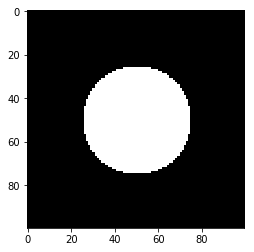

In [6]:
fig = circle_gen.create()
plt.imshow(fig.data, cmap='gray');

The generator for squares, and an example.

In [7]:
square_gen = figures.SquareGenerator(width, height, max_size)

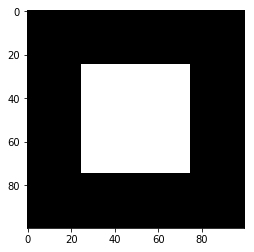

In [8]:
fig = square_gen.create()
plt.imshow(fig.data, cmap='gray');

The generator for equilateral triangles, and an example.

In [9]:
triangle_gen = figures.TriangleGenerator(width, height, max_size)

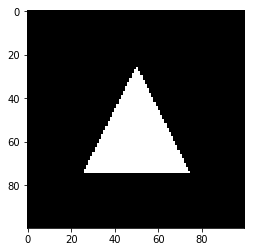

In [10]:
fig = triangle_gen.create()
plt.imshow(fig.data, cmap='gray');

## Transformations

A transformation can be scaling the geometric object (down), rotating it, shifting it and performing a Gaussian blur.

In [11]:
transformer = figures.FigureTransformer(width=width, height=height,
                                               min_size=10, max_size=max_size,
                                               center_margin=0.3,
                                               blur_factor=3.0)

Execture some random scalings on a square.

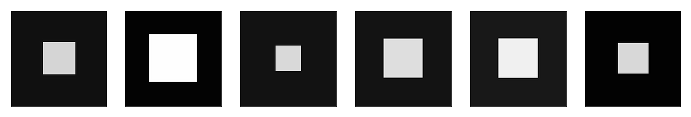

In [12]:
nr_plots = 6
figure, axes = plt.subplots(ncols=nr_plots, nrows=1, figsize=(12, 4))
for i in range(nr_plots):
    fig = square_gen.create()
    transformer.scale(fig)
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
    axes[i].imshow(fig.data, cmap='gray')

Execute some random rotations on a square.

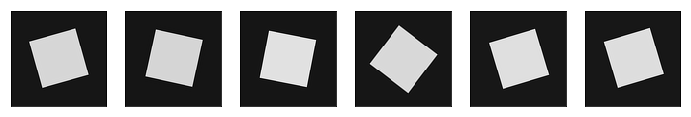

In [13]:
nr_plots = 6
figure, axes = plt.subplots(ncols=nr_plots, nrows=1, figsize=(12, 4))
for i in range(nr_plots):
    fig = square_gen.create()
    transformer.rotate(fig)
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
    axes[i].imshow(fig.data, cmap='gray')

Execute some random shifts on a square.

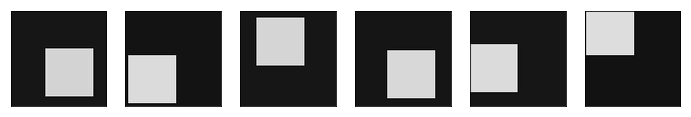

In [14]:
nr_plots = 6
figure, axes = plt.subplots(ncols=nr_plots, nrows=1, figsize=(12, 4))
for i in range(nr_plots):
    fig = square_gen.create()
    transformer.shift(fig)
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
    axes[i].imshow(fig.data, cmap='gray')

Execute some random blurs on a triangle.

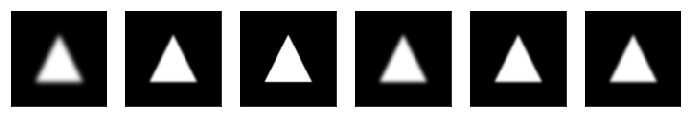

In [15]:
nr_plots = 6
figure, axes = plt.subplots(ncols=nr_plots, nrows=1, figsize=(12, 4))
for i in range(nr_plots):
    fig = triangle_gen.create()
    transformer.blur(fig)
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
    axes[i].imshow(fig.data, cmap='gray')

Generate random geometric objects, with all transformations applied.

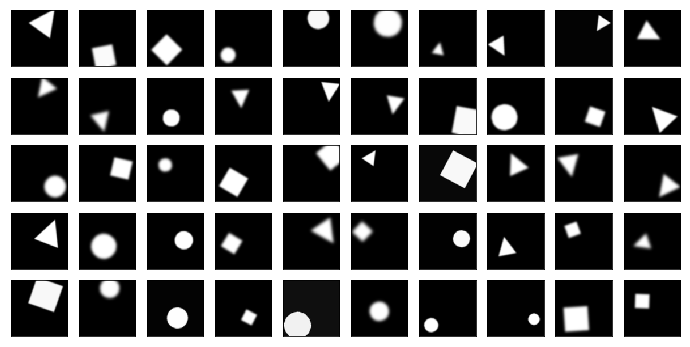

In [16]:
nrows, ncols = 5, 10
generators = [triangle_gen, square_gen, circle_gen]
figure, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, 6))
for i in range(nrows):
    for j in range(ncols):
        generator = random.choice(generators)
        fig = generator.create()
        transformer.transform(fig)
        axes[i, j].get_xaxis().set_visible(False)
        axes[i, j].get_yaxis().set_visible(False)
        axes[i, j].imshow(fig.data, cmap='gray')

## HDF5 files

The script part of `figures` will write an HDF5 file with the data. The input dataset is called `x_values`, the output dataset `y_values`.

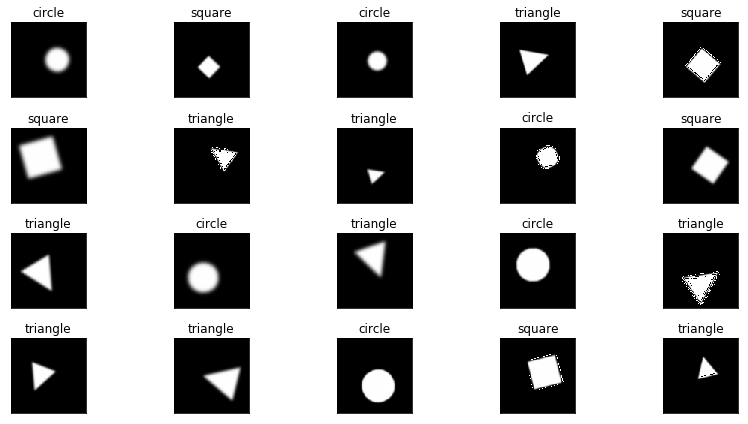

In [17]:
import h5py
from pathlib import Path
import subprocess

nrows, ncols = 4, 5
h5_path = Path('data.h5')
if not h5_path.exists():
    subprocess.call(['./figures.py', '--n', str(nrows*ncols), h5_path.as_posix()])

object_types = ['circle', 'square', 'triangle']
figure, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, 6))
with h5py.File('data.h5', 'r') as h5_file:
    for i in range(nrows):
        for j in range(ncols):
            index = i*ncols + j
            fig = h5_file['x_values'][index]
            axes[i, j].get_xaxis().set_visible(False)
            axes[i, j].get_yaxis().set_visible(False)
            axes[i, j].set_title(object_types[h5_file['y_values'][index]])
            axes[i, j].imshow(fig, cmap='gray')
figure.tight_layout()

## Multiple objects per image

In [18]:
import h5py
import numpy as np

In [19]:
with h5py.File('small.h5', 'r') as h5_file:
    images = np.array(h5_file['x_values'])
    labels = np.array(h5_file['y_values'])
images = images.astype(np.float)

In [20]:
images.shape

(1000, 100, 100)

In [21]:
multiple = images[0] + images[1] + images[3]

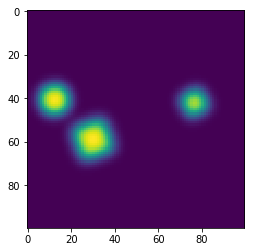

In [22]:
plt.imshow(multiple)